<a href="https://colab.research.google.com/github/walterfolk/data_science_II_CODER/blob/main/Proyecto_DS_II_FOLK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Final Data Science CODERHOUSE**

### El dataset elegido es sobre clientes usuarios de tarjetas de crédito extraido de la pagina kaggle (https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?select=BankChurners.csv), el cual esta discriminado principalmente entre quienes son clientes actuales y quienes han abandonado el servicio.

# **Obejtivo planteado:**

El desafío aquí para el conjunto de datos es el siguiente: un banco se ve afectado por el gran número de clientes que dejan de utilizar sus tarjetas de crédito (rotación).

En este sentido, la propuesta es crear un modelo de predicción basado en **Regresión Logística** para poder predecir el abandono de clientes de tarjetas de crédito, intentando realizar acciones predictivas para aquellos clientes que tienen un mayor potencial de abandono. Siguiendo con el planteo del desafío se probará un modelo de **Árbol de Decisión** con el objetivo de comparar ambos modelos y determinar si éste último tiene mejor desempeño a lo hora de obtener los resultados del estudio.

Además, tenemos otro desafío con respecto a los datos que presenta el dataset: solo tenemos un 15,72% de clientes que 'abandonan'.

Por lo tanto, crearemos un modelo de regresión logística para predecir la deserción de la base de clientes de este banco.
  

# **Hipótesis centrales que sustentan este modelo:**

**Existen variables significativas que predicen el abandono:**

* Históricas: Frecuencia de uso, monto de las transacciones, tipo de gastos, antigüedad de la cuenta, etc.
* Interacciones: Combinaciones de variables que pueden revelar patrones más profundos (por ejemplo, clientes con alta frecuencia de uso pero bajo monto promedio).
* Demográficas: Edad, género, ubicación geográfica, nivel de ingresos, etc.

# **Sobre el modelo de predicción elegido:**

**El modelo de regresión logística es adecuado para capturar la relación entre las variables y el abandono:**

* Se asume que la probabilidad de abandono sigue una distribución logística.
* Esta es una suposición común en este tipo de problemas y suele funcionar bien en la práctica.
* La regresión logística es un modelo relativamente fácil de interpretar, lo que permite identificar las variables más importantes para predecir el abandono y entender la dirección de su efecto.



















# **Lectura de datos**

# **Librerias utilizadas para el análisis y configuracion del entorno de Python**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score


In [ ]:
sns.set_palette('husl', 8)
sns.set_style('darkgrid')

# **Ubicación de la carpeta con el dataset**

# **Lectura del dataset**

In [ ]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/walterfolk/CoderDS/main/BankChurners.csv')

# **Análisis preliminar del dataset**

In [ ]:
df_bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df_bank.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df_bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Por recomendación de la página donde se extrajo el dataset se eliminan las siguientes columnas Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 y se agrega la columna de "CLIENTNUM" ya que no se considera relevante

In [ ]:
df_bank=df_bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis = 1)

Se traducen los nombres de las columnas con el fin de que sea facilmente legible.

In [ ]:
columnas_traducidas = {
    'Attrition_Flag': 'Abandono',
    'Customer_Age': 'Edad_Cliente',
    'Gender': 'Genero',
    'Dependent_count': 'Numero_Dependientes',
    'Education_Level': 'Nivel_Educativo',
    'Marital_Status': 'Estado_Civil',
    'Income_Category': 'Categoria_Ingresos',
    'Card_Category': 'Categoria_Tarjeta',
    'Months_on_book': 'Meses_Cliente',
    'Total_Relationship_Count': 'Numero_Productos',
    'Months_Inactive_12_mon': 'Meses_Inactivo_12m',
    'Contacts_Count_12_mon': 'Contactos_12m',
    'Credit_Limit': 'Limite_Credito',
    'Total_Revolving_Bal': 'Saldo_Rotatorio',
    'Avg_Open_To_Buy': 'Promedio_Disponible',
    'Total_Amt_Chng_Q4_Q1': 'Cambio_Total_Q4_Q1',
    'Total_Trans_Amt': 'Monto_Transacciones',
    'Total_Trans_Ct': 'Cantidad_Transacciones',
    'Total_Ct_Chng_Q4_Q1': 'Cambio_Transacciones_Q4_Q1',
    'Avg_Utilization_Ratio': 'Ratio_Uso_Promedio'
}

df_bank = df_bank.rename(columns=columnas_traducidas)
df_bank.head()

,Abandono,Edad_Cliente,Genero,Numero_Dependientes,Nivel_Educativo,Estado_Civil,Categoria_Ingresos,Categoria_Tarjeta,Meses_Cliente,Numero_Productos,Meses_Inactivo_12m,Contactos_12m,Limite_Credito,Saldo_Rotatorio,Promedio_Disponible,Cambio_Total_Q4_Q1,Monto_Transacciones,Cantidad_Transacciones,Cambio_Transacciones_Q4_Q1,Ratio_Uso_Promedio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df_bank.columns

Index(['Abandono', 'Edad_Cliente', 'Genero', 'Numero_Dependientes',
       'Nivel_Educativo', 'Estado_Civil', 'Categoria_Ingresos',
       'Categoria_Tarjeta', 'Meses_Cliente', 'Numero_Productos',
       'Meses_Inactivo_12m', 'Contactos_12m', 'Limite_Credito',
       'Saldo_Rotatorio', 'Promedio_Disponible', 'Cambio_Total_Q4_Q1',
       'Monto_Transacciones', 'Cantidad_Transacciones',
       'Cambio_Transacciones_Q4_Q1', 'Ratio_Uso_Promedio'],
      dtype='object')

# **Descripción de variables**

*   **Abandono:** Identificación de los clientes existentes y que han abandonado el servicio (Abandono: 0, Existente: 1)
*   **Edad_Cliente:** Edades de los clientes
*   **Genero:** Genero del cliente (Femenino y Masculino)
*   **Numero_Dependientes:** Número de dependientes del cliente
*   **Nivel_Educativo:** Nivel educativo de los clientes
*   **Estado_Civil:** Estado civíl de los clientes
*   **Categoria_Ingresos:** Nivel de ingresos anuales de los clientes
*   **Mese_Cliente:** Cantidad de meses como clientes
*   **Nuemero_Productos:** Número total de productos en poder del cliente
*   **Meses_Incativo_12m:** Número de meses inactivos en los últimos 12 meses
*   **Contactos_12m:** Número de contactos en los últimos 12 meses
*   **Limite_Credito:** Límite de crédito en la tarjeta de crédito
*   **Saldo_Rotatorio:** Saldo rotatorio total de la tarjeta de crédito
*   **Promedio_Disponible:** Línea de Crédito Abierta para Comprar (Promedio de los últimos 12 meses)
*   **Cambio_Total_Q4_Q1:** Cambio en el monto de la transacción (Q4 sobre Q1)
*   **Monto_Transacciones:** Monto total de la transacción (últimos 12 meses)
*   **Cantidad_Transacciones:** Recuento total de transacciones (últimos 12 meses)
*   **Cambio_Transacciones_Q4_Q1:** Cambio en el recuento de transacciones (cuarto trimestre respecto al primer trimestre)
*   **Ratio_Uso_Promedio:** Índice de utilización promedio de la tarjeta















# **Limpieza y transformación de datos**

Antes de realizar el EDA, necesitaremos realizar un procesamiento de datos inicial para ejecutar el modelo, por lo que realizaremos este proceso primero.

Se crean dos arrays que contienen cada uno las columnas numéricas y categóricas

In [ ]:
columnas_numericas = ['Edad_Cliente','Numero_Dependientes','Meses_Cliente','Numero_Productos','Meses_Inactivo_12m','Contactos_12m','Limite_Credito','Saldo_Rotatorio','Promedio_Disponible',
                      'Cambio_Total_Q4_Q1','Monto_Transacciones','Cantidad_Transacciones','Cambio_Transacciones_Q4_Q1','Ratio_Uso_Promedio']
columnas_categoricas = ['Abandono', 'Genero','Nivel_Educativo', 'Estado_Civil','Categoria_Ingresos', 'Categoria_Tarjeta']

df_bank.head()

,Abandono,Edad_Cliente,Genero,Numero_Dependientes,Nivel_Educativo,Estado_Civil,Categoria_Ingresos,Categoria_Tarjeta,Meses_Cliente,Numero_Productos,Meses_Inactivo_12m,Contactos_12m,Limite_Credito,Saldo_Rotatorio,Promedio_Disponible,Cambio_Total_Q4_Q1,Monto_Transacciones,Cantidad_Transacciones,Cambio_Transacciones_Q4_Q1,Ratio_Uso_Promedio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df_bank[columnas_numericas]

,Edad_Cliente,Numero_Dependientes,Meses_Cliente,Numero_Productos,Meses_Inactivo_12m,Contactos_12m,Limite_Credito,Saldo_Rotatorio,Promedio_Disponible,Cambio_Total_Q4_Q1,Monto_Transacciones,Cantidad_Transacciones,Cambio_Transacciones_Q4_Q1,Ratio_Uso_Promedio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df_bank[columnas_categoricas]

,Abandono,Genero,Nivel_Educativo,Estado_Civil,Categoria_Ingresos,Categoria_Tarjeta
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [ ]:
df_bank[columnas_numericas].describe()

,Edad_Cliente,Numero_Dependientes,Meses_Cliente,Numero_Productos,Meses_Inactivo_12m,Contactos_12m,Limite_Credito,Saldo_Rotatorio,Promedio_Disponible,Cambio_Total_Q4_Q1,Monto_Transacciones,Cantidad_Transacciones,Cambio_Transacciones_Q4_Q1,Ratio_Uso_Promedio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df_bank.nunique()

,0
Abandono,2
Edad_Cliente,45
Genero,2
Numero_Dependientes,6
Nivel_Educativo,7
Estado_Civil,4
Categoria_Ingresos,6
Categoria_Tarjeta,4
Meses_Cliente,44
Numero_Productos,6


# **Corroboración de la existencia de datos nulos**

In [ ]:
df_bank.isnull().sum()

,0
Abandono,0
Edad_Cliente,0
Genero,0
Numero_Dependientes,0
Nivel_Educativo,0
Estado_Civil,0
Categoria_Ingresos,0
Categoria_Tarjeta,0
Meses_Cliente,0
Numero_Productos,0


# **Corroboración de valores duplicados y eliminación de valores nulos**
Para que los modelos futuros funcionen correctamente se procede a eliminar a aquellos valores considerados no nulos, pero que, en la práctica lo son, al ser desconocidos. A medida que se avanzaba en la construcción del código, se observó que teníamos valores considerados no nulos, pero que, en la práctica, lo son, al ser desconocidos. Por lo tanto se  procede a eliminarlos.

In [ ]:
df_bank.replace('Unknown', np.nan, inplace = True)
df_bank.dropna(inplace = True)

In [ ]:
df_bank.duplicated().sum()

0

#**Transformación de variables categoricas**
 Empezamos transformado a int las variables categóricas 'Abandono', 'Genero', 'Categoria_Tarjeta', 'Nivel_Educativo', 'Estado_Civil' y 'Categoria_Ingresos' utilizando el método de *label encoding*. Para la columna edad se cambian los valores de las edades por rangos de edades.

In [ ]:
abandono = {'Existing Customer': 0,
            'Attrited Customer': 1
            }

df_bank['Abandono'] = df_bank['Abandono'].map(abandono)

genero = {'M': 0,
          'F': 1
          }

df_bank['Genero'] = df_bank['Genero'].map(genero)

cat_tarjeta = {'Blue': 0,
          'Gold': 1,
          'Silver': 2,
          'Platinum': 3
        }

df_bank['Categoria_Tarjeta'] = df_bank['Categoria_Tarjeta'].map(cat_tarjeta)

educacion= {    'Uneducated': 0,
                'High School': 1,
                'College': 2,
                'Graduate': 3,
                'Post-Graduate': 4,
                'Doctorate': 5
               }

df_bank['Nivel_Educativo'] = df_bank['Nivel_Educativo'].map(educacion)

estado_civil = {'Single': 0,
                'Married': 1,
                'Divorced': 2
               }

df_bank['Estado_Civil'] = df_bank['Estado_Civil'].map(estado_civil)

categoria_ingresos = {
                'Less than $40K': 0,
                '$40K - $60K': 1,
                '$60K - $80K': 2,
                '$80K - $120K': 3,
                '$120K +': 4
               }

df_bank['Categoria_Ingresos'] = df_bank['Categoria_Ingresos'].map(categoria_ingresos)

df_bank['Franja_Edad'] = pd.cut(x = df_bank['Edad_Cliente'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [0,1,2,3,4,5])
df = df_bank.drop('Edad_Cliente', axis = 1)

# **Valores outliers**


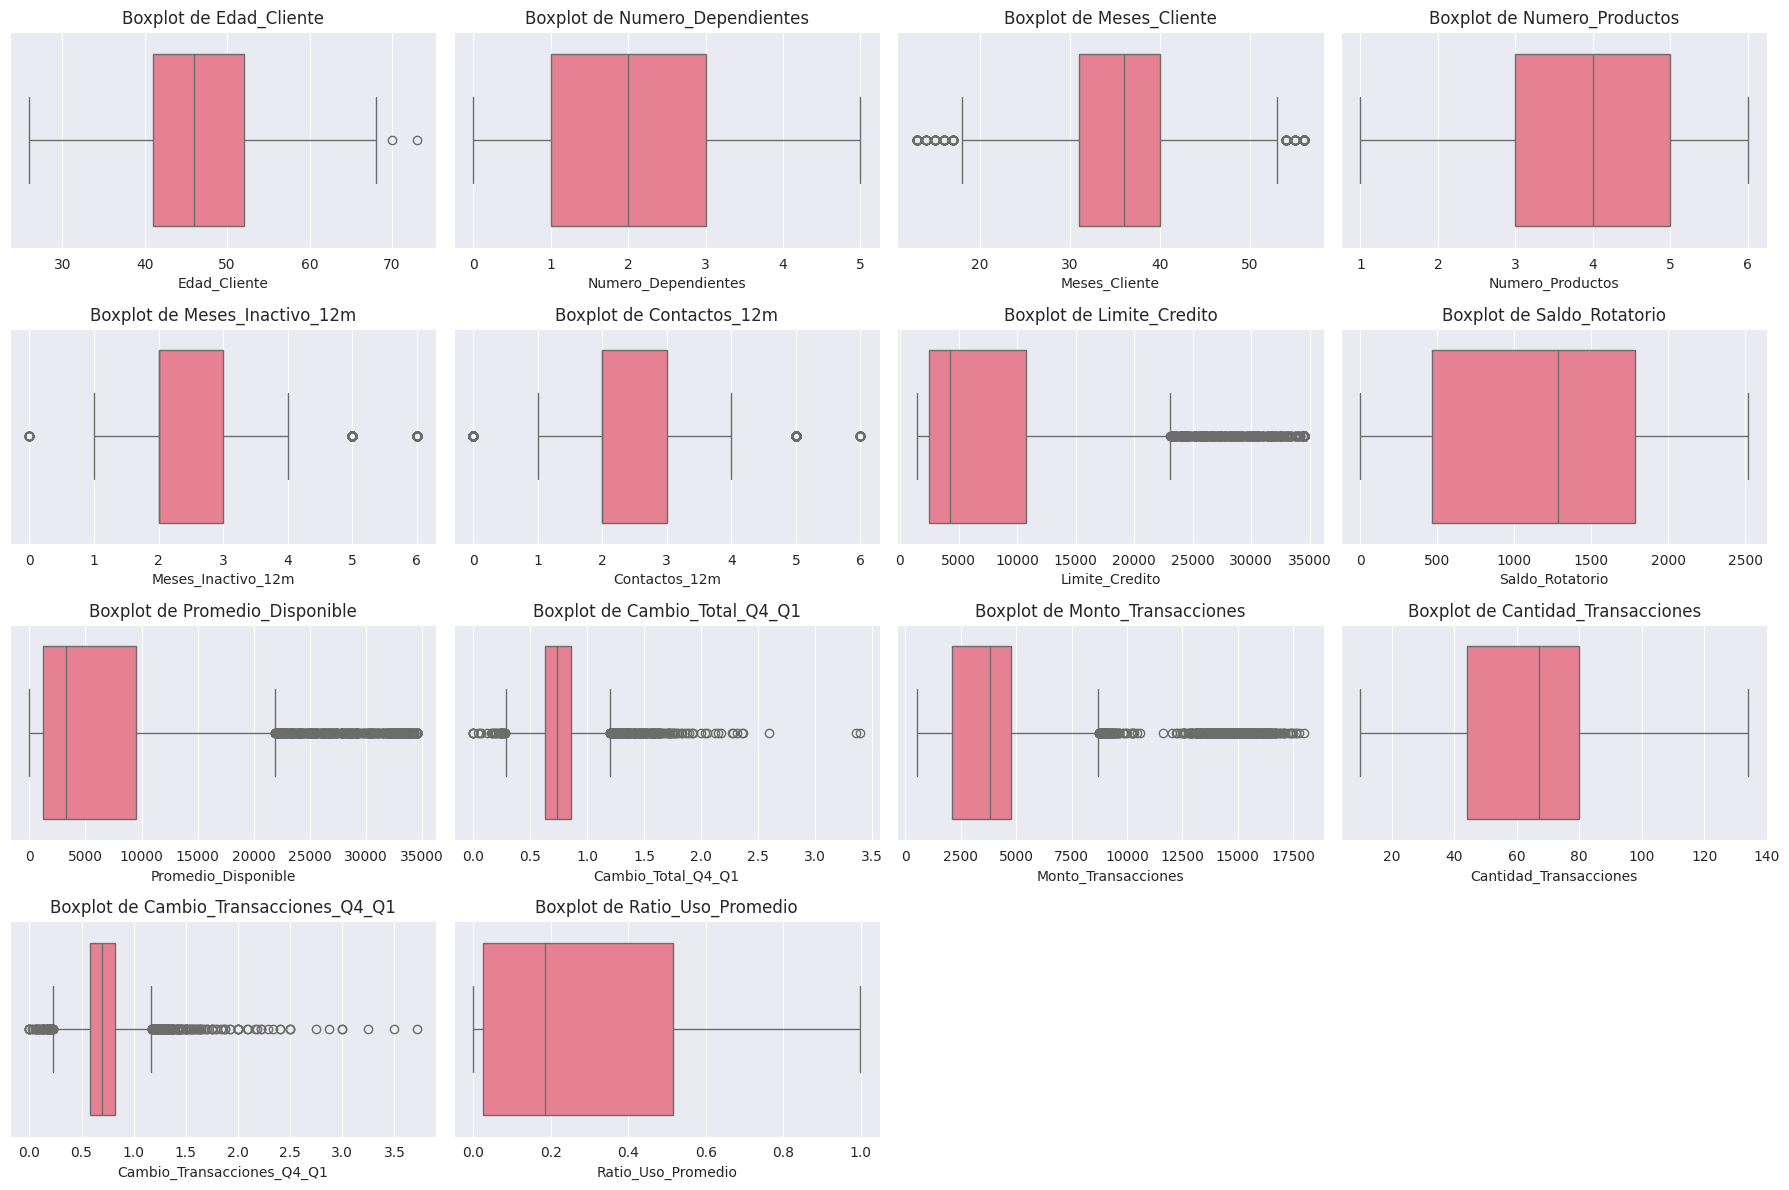

In [ ]:
plt.figure(figsize=(18, 12))

num_cols = len(columnas_numericas) // 3
num_rows = (len(columnas_numericas) + num_cols - 1) // num_cols
for i, col in enumerate(columnas_numericas):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df_bank[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


# **EDA Inicial**

##Análisis univariado

<ipython-input-22-b8a041606da2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_bank['Abandono'], palette='husl')


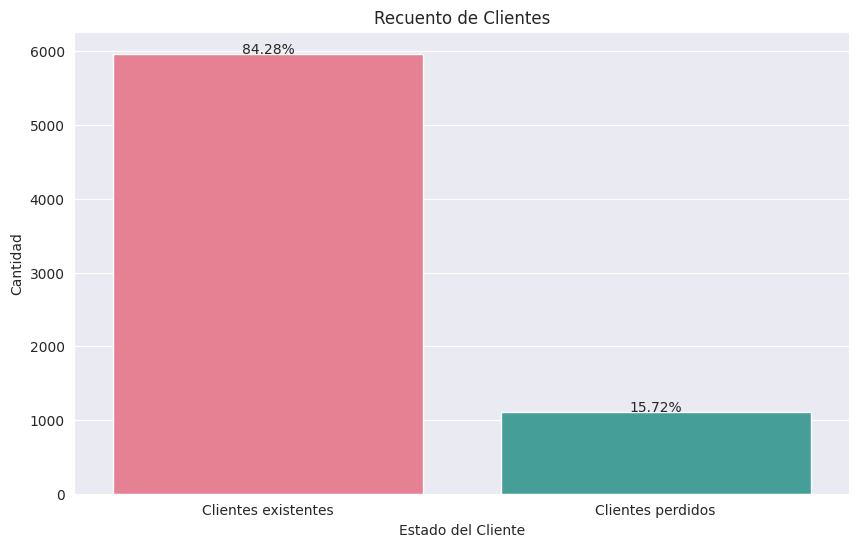

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df_bank['Abandono'], palette='husl')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad')
plt.title('Recuento de Clientes')

total = len(df_bank['Abandono'])

for i in ax.patches:
    altura = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., altura + 0.1, '{:1.2f}%'.format((altura/total) * 100), ha ='center')

plt.xticks(ticks = [0,1], labels = ['Clientes existentes', 'Clientes perdidos'])

plt.show()

<ipython-input-23-3d76b17471cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_bank['Genero'], data = df_bank, palette='husl')


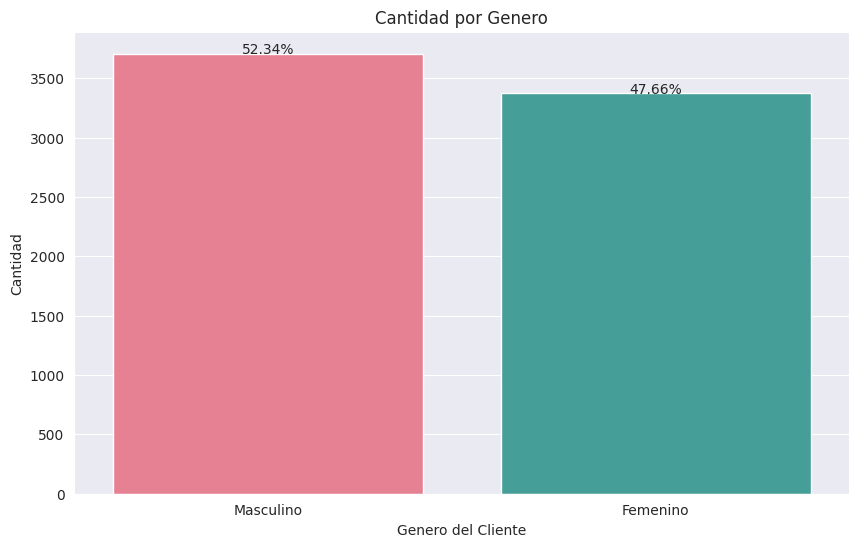

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df_bank['Genero'], data = df_bank, palette='husl')
plt.xlabel('Genero del Cliente')
plt.ylabel('Cantidad')
plt.title('Cantidad por Genero')

total = len(df_bank['Genero'])

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., altura + 0.1, '{:1.2f}%'.format((altura/total) * 100), ha ='center')

plt.xticks(ticks = [0,1], labels = ['Masculino', 'Femenino'])

plt.show()

<ipython-input-24-682d11ecd0c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_bank['Categoria_Tarjeta'], data = df_bank, palette='husl')


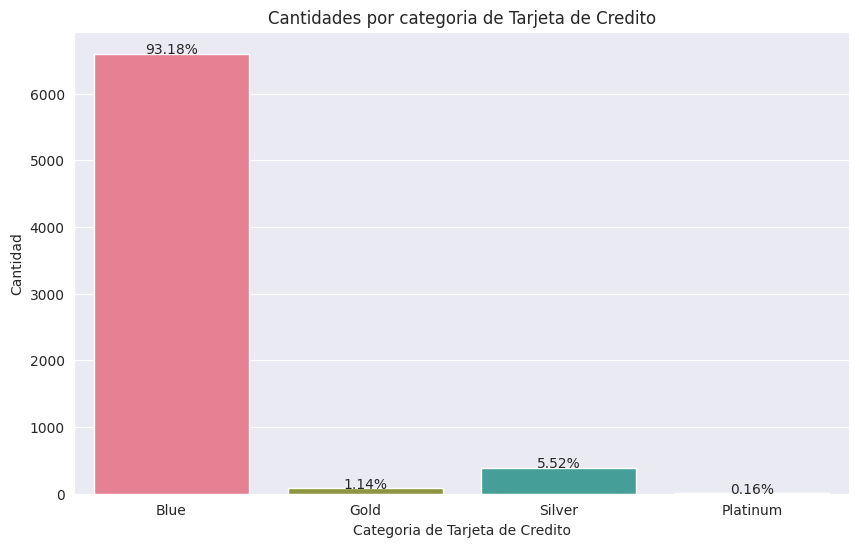

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df_bank['Categoria_Tarjeta'], data = df_bank, palette='husl')
plt.xlabel('Categoria de Tarjeta de Credito')
plt.ylabel('Cantidad')
plt.title('Cantidades por categoria de Tarjeta de Credito')

total = len(df_bank['Categoria_Tarjeta'])

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., altura + 0.1, '{:1.2f}%'.format((altura/total) * 100), ha ='center')

plt.xticks(ticks = [0,1,2,3], labels = ['Blue', 'Gold', 'Silver', 'Platinum'])

plt.show()

<ipython-input-25-a27e52e524a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_bank['Nivel_Educativo'], data = df_bank, palette='husl')


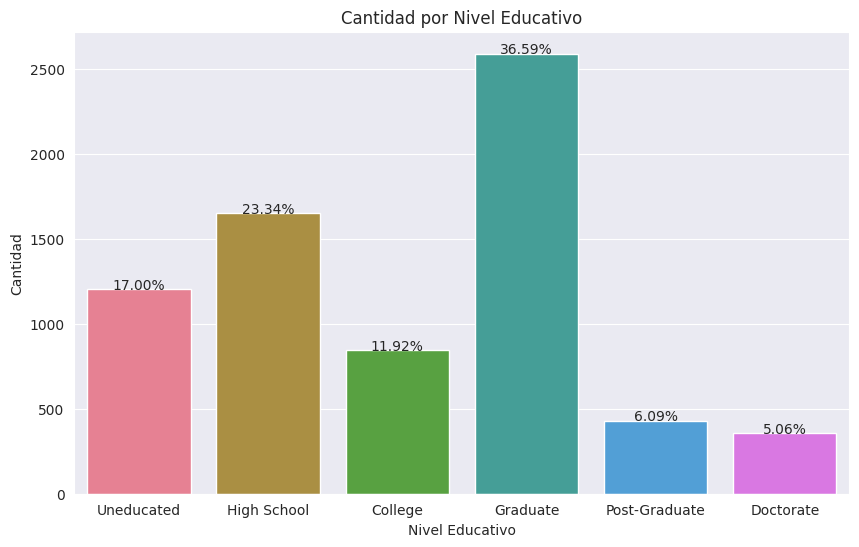

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df_bank['Nivel_Educativo'], data = df_bank, palette='husl')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad')
plt.title('Cantidad por Nivel Educativo')

total = len(df_bank['Abandono'])

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., altura + 0.1, '{:1.2f}%'.format((altura/total) * 100), ha ='center')


plt.xticks(ticks = [0,1,2,3,4,5], labels = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'])

plt.show()

<ipython-input-26-1b1bba0729d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_bank['Estado_Civil'], data = df_bank, palette='husl')


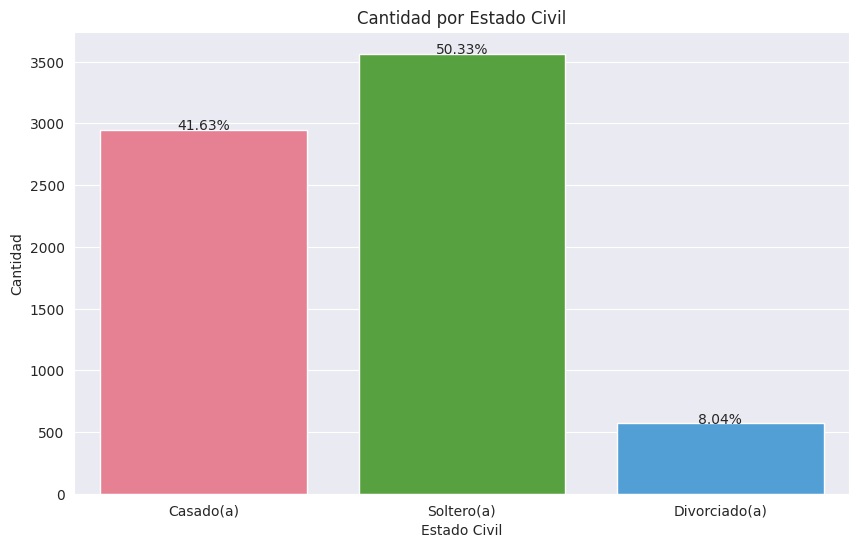

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df_bank['Estado_Civil'], data = df_bank, palette='husl')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.title('Cantidad por Estado Civil')

total = len(df_bank['Estado_Civil'])

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., altura + 0.1, '{:1.2f}%'.format((altura/total) * 100), ha ='center')


plt.xticks(ticks = [0,1,2], labels = ['Casado(a)', 'Soltero(a)', 'Divorciado(a)'])

plt.show()

<ipython-input-27-17b5ebea55aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_bank['Categoria_Ingresos'], data = df_bank, palette='husl')


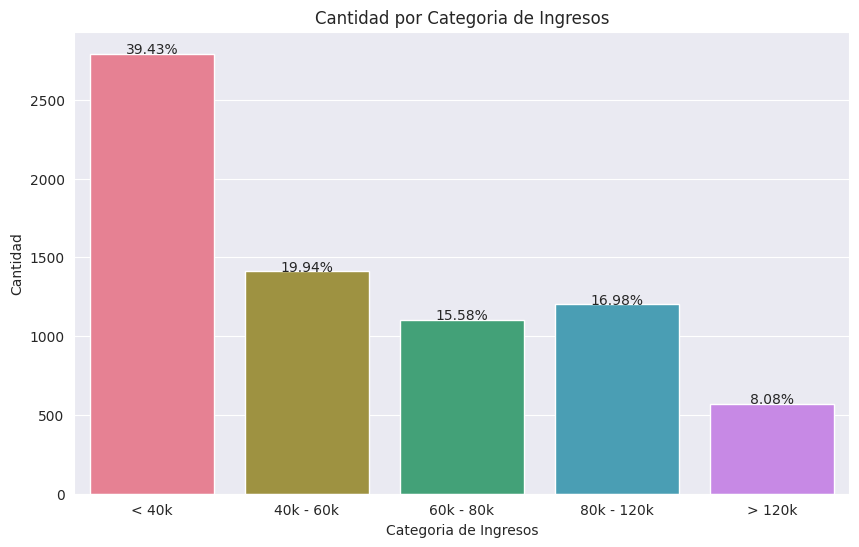

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df_bank['Categoria_Ingresos'], data = df_bank, palette='husl')
plt.xlabel('Categoria de Ingresos')
plt.ylabel('Cantidad')
plt.title('Cantidad por Categoria de Ingresos')

total = len(df['Categoria_Ingresos'])

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., altura + 0.1, '{:1.2f}%'.format((altura/total) * 100), ha ='center')


plt.xticks(ticks = [0,1,2,3,4], labels = ['< 40k', '40k - 60k', '60k - 80k', '80k - 120k', '> 120k'])

plt.show()

<ipython-input-28-2d0695d2102c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_bank['Franja_Edad'], data = df_bank, palette='husl')


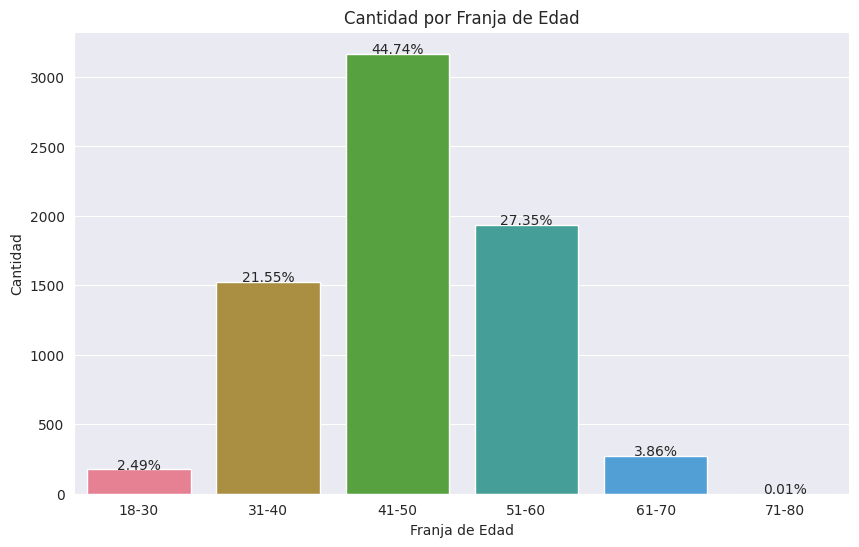

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df_bank['Franja_Edad'], data = df_bank, palette='husl')
plt.xlabel('Franja de Edad')
plt.ylabel('Cantidad')
plt.title('Cantidad por Franja de Edad')

total = len(df_bank['Franja_Edad'])

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., altura + 0.1, '{:1.2f}%'.format((altura/total) * 100), ha ='center')


plt.xticks(ticks = [0,1,2,3,4,5], labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

plt.show()

##Resumen inicial de EDA
* Abandono: tenemos que el 15,72% de nuestra base de clientes que se encuentran en la categoría 'Perdido'.
* Género y Educación: tenemos una base de clientes bien distribuida en términos de género, siendo la mayoría todavía hombres. La mayoría de la base de clientes (36,59%) ha completado su educación universitaria.
Se observa que el género femenino es el que tiene más predominancia por abandonar el servicio y dentro de éste los de la categoría "Graduate" son los que van a la vanguardia.
* Categoría de tarjeta de crédito: la inmensa mayoría de la base de clientes (93,12%) se concentra en la categoría Tarjeta Azul, que es la tarjeta de entrada del banco bajo análisis.
* Estado civil: la mayoría de la base de clientes (50,33%) está casada.
* Categoría de ingresos: el 53,86% de la base de clientes tiene un ingreso superior a 40k, mientras que por lo menos el 39,43% de la base de clientes tiene un nivel de ingreso inferior a esta cantidad.
* Franja de edad: La mayoría de la base de clientes (44,74%) se encuentra dentro de la franja de edad entre 41 a 50 años.

##Análisis Multivariado

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, HoverTool
from bokeh.transform import factor_cmap

output_notebook()

#Creacion de las variables que filtran el abandono por cada genero
hombres = df_bank[(df_bank['Abandono'] == 1) & (df_bank['Genero'] == 0)]
educacion_hombres = hombres['Nivel_Educativo'].value_counts().sort_index()
total_hombres = educacion_hombres.sum()

mujeres = df_bank[(df_bank['Abandono'] == 1) & (df_bank['Genero'] == 1)]
educacion_mujeres = mujeres['Nivel_Educativo'].value_counts().sort_index()
total_mujeres = educacion_mujeres.sum()

#Creacion de la variable que contiene los niveles educativos
niveles_educativos = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Total']

#Creacion del diccionario para la categoria hombres y mujeres para cada nivel educativo
hombres_ed = ColumnDataSource(data=dict(
    niveles=niveles_educativos,
    counts=[educacion_hombres[i] if i in educacion_hombres.index else 0 for i in range(6)] + [total_hombres]
    ))

mujeres_ed = ColumnDataSource(data=dict(
    niveles=niveles_educativos,
    counts=[educacion_mujeres[i] if i in educacion_mujeres.index else 0 for i in range(6)] + [total_mujeres]
    ))

# Colores que se utilizaran en cada barra
colores = ["#c9d9d3", "#718dbf", "#e84d60", "#1c77c3", "#ff9912", "#00cc99", "#b3e6b3"]

# Hover Tools para hombres y mujeres
hover_hombres = HoverTool(tooltips=[("Nivel Educativo", "@niveles"), ("Cantidad", "@counts")])
hover_mujeres = HoverTool(tooltips=[("Nivel Educativo", "@niveles"), ("Cantidad", "@counts")])

# Crear gráfico para hombres
p_hombres = figure(x_range=FactorRange(*niveles_educativos), title="Abandono por Nivel Educativo (Hombres)",
                  toolbar_location=None, tools=[hover_hombres], width=600, height=400)
p_hombres.vbar(x='niveles', top='counts', width=0.9, source=hombres_ed,
             fill_color=factor_cmap('niveles', palette=colores, factors=niveles_educativos))
p_hombres.xaxis.axis_label = "Nivel Educativo"
p_hombres.yaxis.axis_label = "Cantidad de Clientes"
p_hombres.add_tools(hover_hombres)

#Crear gráfico para mujeres
p_mujeres = figure(x_range=FactorRange(*niveles_educativos), title="Abandono por Nivel Educativo (Mujeres)",
                  toolbar_location=None, tools=[hover_mujeres], width=600, height=400)
p_mujeres.vbar(x='niveles', top='counts', width=0.9, source=mujeres_ed,
             fill_color=factor_cmap('niveles', palette=colores, factors=niveles_educativos))
p_mujeres.xaxis.axis_label = "Nivel Educativo"
p_mujeres.yaxis.axis_label = "Cantidad de Clientes"
p_mujeres.add_tools(hover_mujeres)

show(p_hombres)
show(p_mujeres)

<ipython-input-31-b34b6b9c2373>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gastos_edad = df_bank.groupby(['Genero', pd.cut(df_bank['Edad_Cliente'], bins=[20, 30, 40, 50, 60, 70, 80])])['Monto_Transacciones'].mean().unstack()


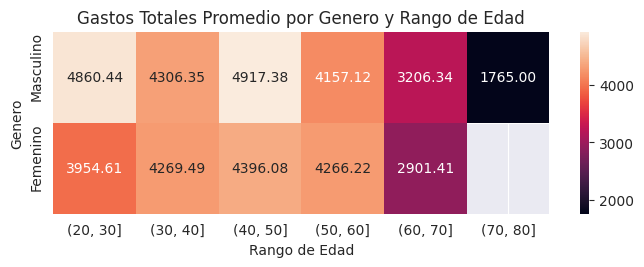

In [ ]:
df_gastos_edad = df_bank.groupby(['Genero', pd.cut(df_bank['Edad_Cliente'], bins=[20, 30, 40, 50, 60, 70, 80])])['Monto_Transacciones'].mean().unstack()

plt.figure(figsize=(8, 2))
sns.heatmap(df_gastos_edad, annot=True, fmt=".2f")
plt.title('Gastos Totales Promedio por Genero y Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Genero')
plt.yticks(ticks = [0,1], labels = ['Masculino', 'Femenino'], va='top')
plt.subplots_adjust(top=1.02)
plt.show()

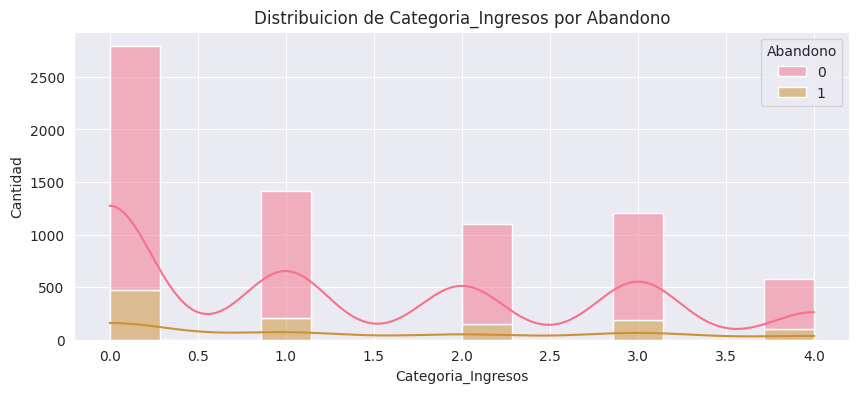

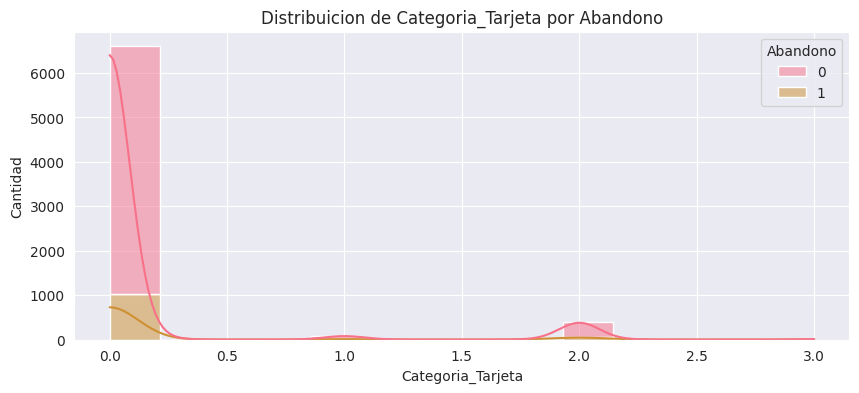

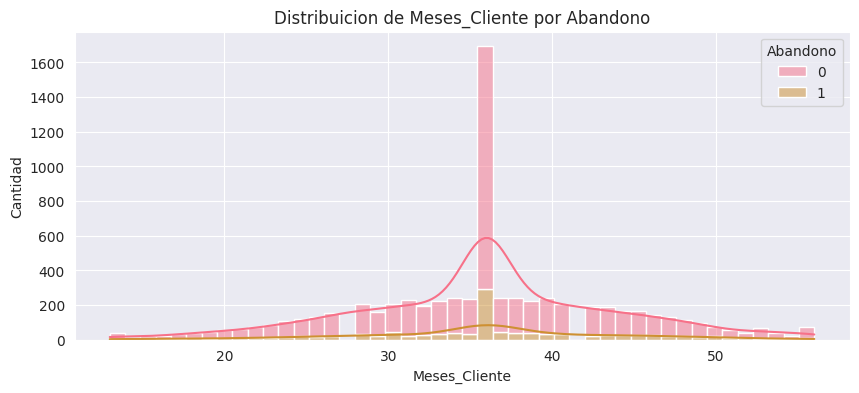

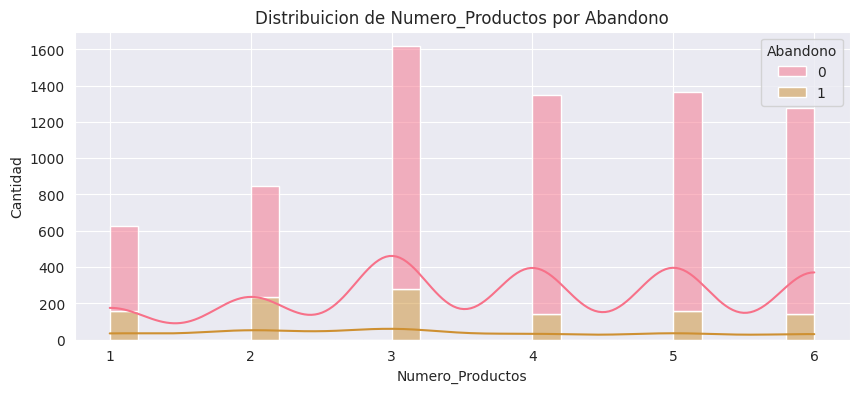

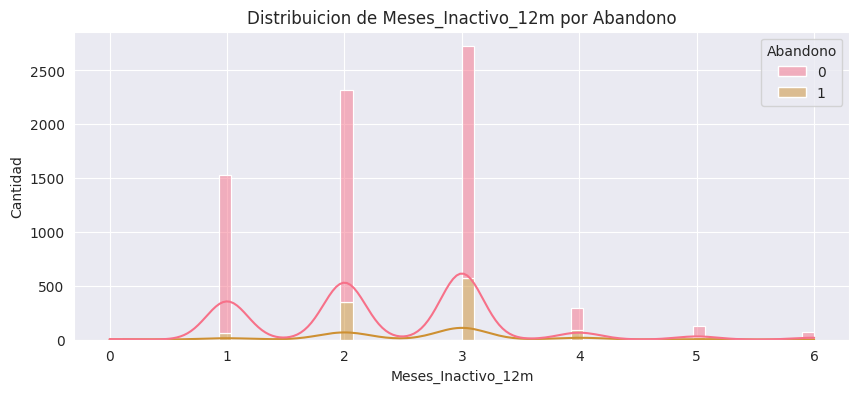

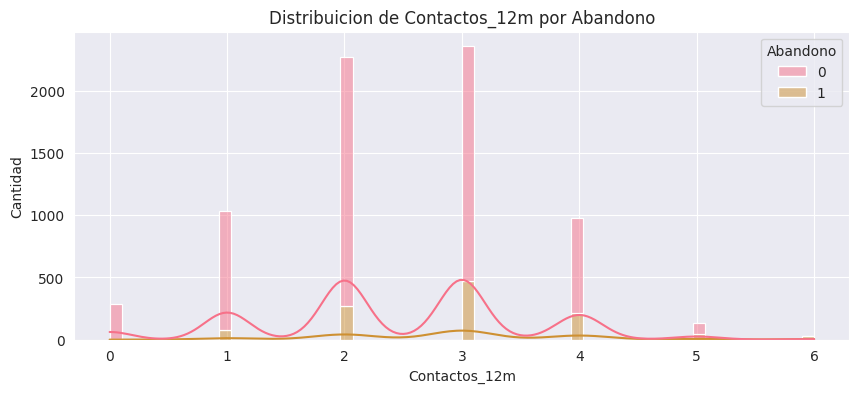

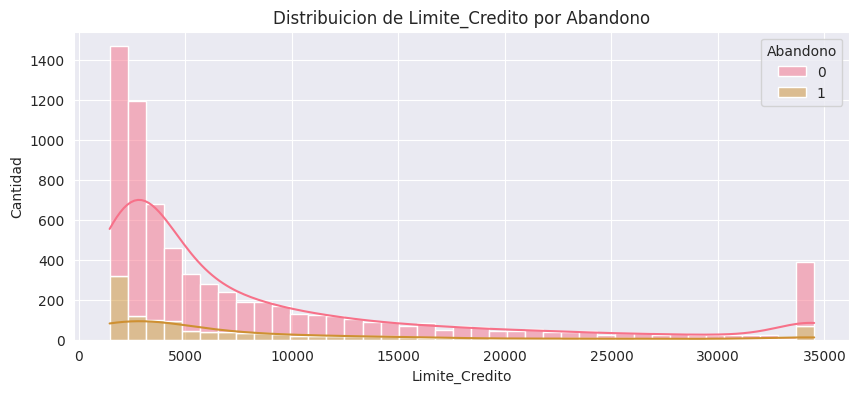

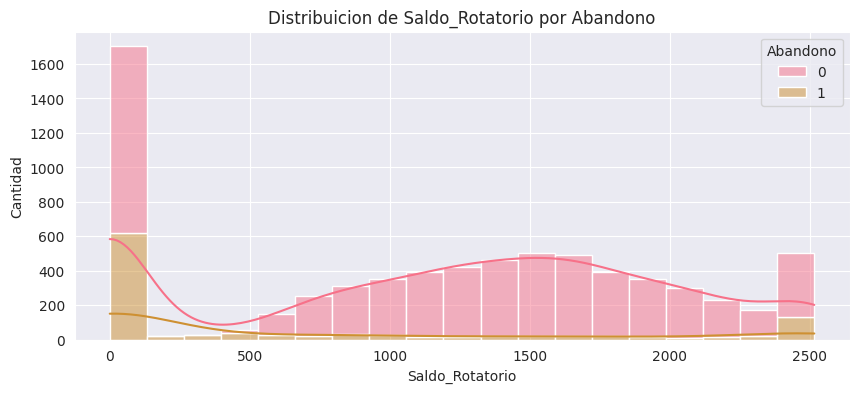

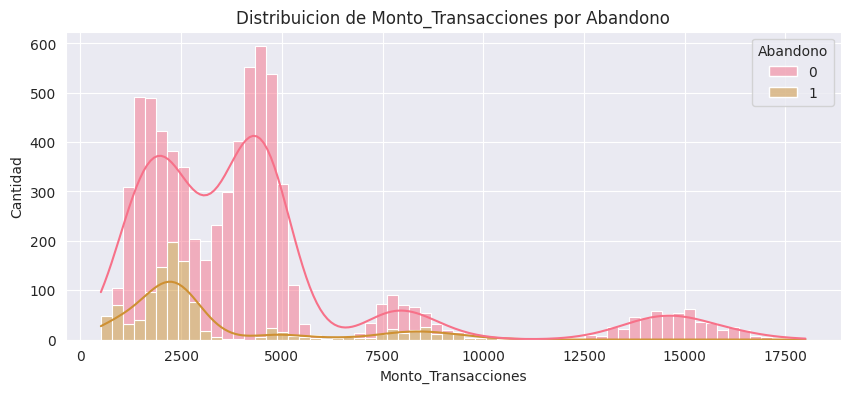

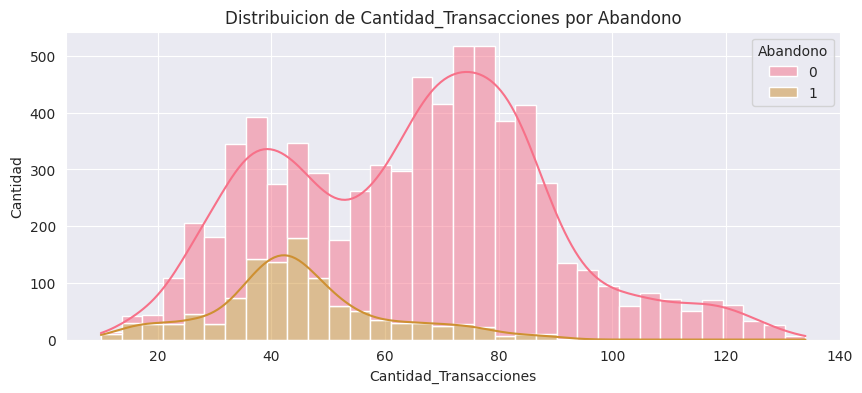

In [ ]:
histogramas = ['Categoria_Ingresos', 'Categoria_Tarjeta', 'Meses_Cliente', 'Numero_Productos',
               'Meses_Inactivo_12m', 'Contactos_12m', 'Limite_Credito','Saldo_Rotatorio',
               'Monto_Transacciones', 'Cantidad_Transacciones']

for histograma in histogramas:
    if histograma != 'Abandono':
        plt.figure(figsize = (10,4))
        sns.histplot(df_bank, x = histograma, hue = 'Abandono', multiple = 'stack', kde = True)
        plt.ylabel('Cantidad')
        plt.title(f'Distribuicion de {histograma} por Abandono')
        plt.show()

<ipython-input-33-787ad0953329>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_bank, x = 'Abandono', y = boxplot, palette='husl')


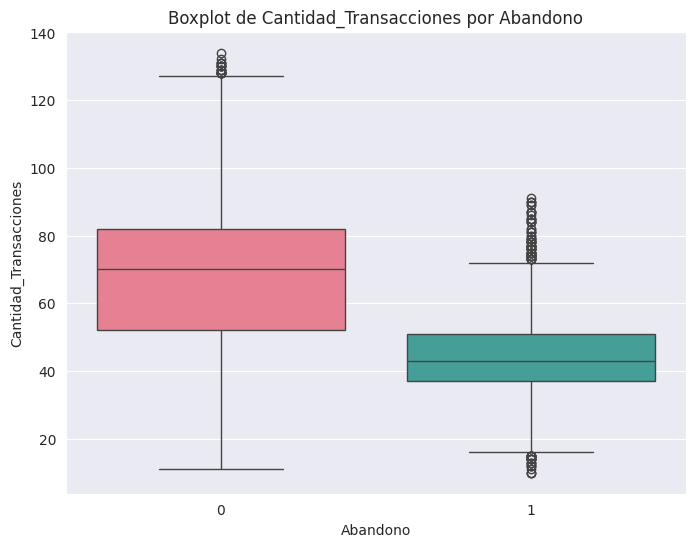

<ipython-input-33-787ad0953329>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_bank, x = 'Abandono', y = boxplot, palette='husl')


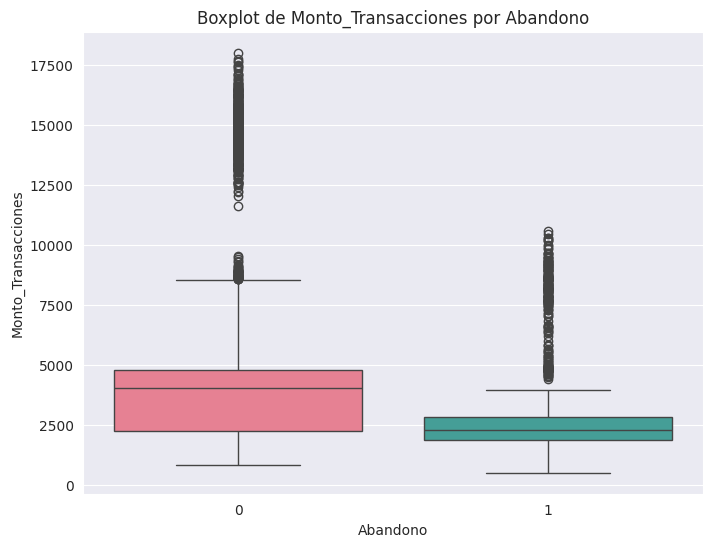

<ipython-input-33-787ad0953329>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_bank, x = 'Abandono', y = boxplot, palette='husl')


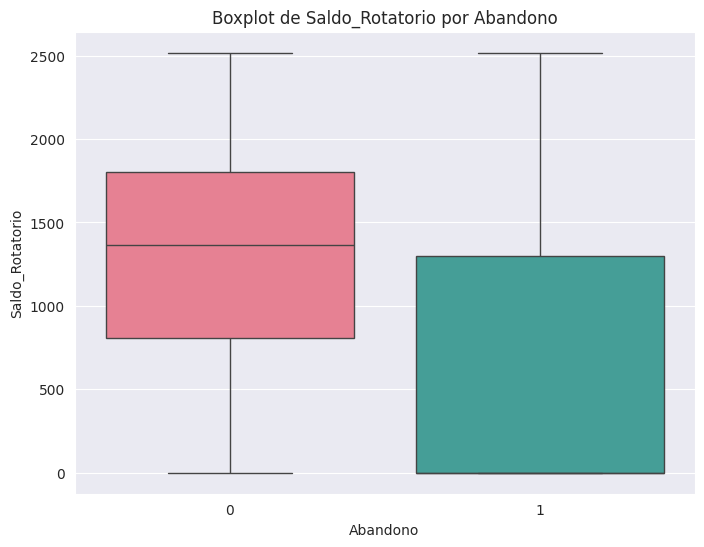

<ipython-input-33-787ad0953329>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_bank, x = 'Abandono', y = boxplot, palette='husl')


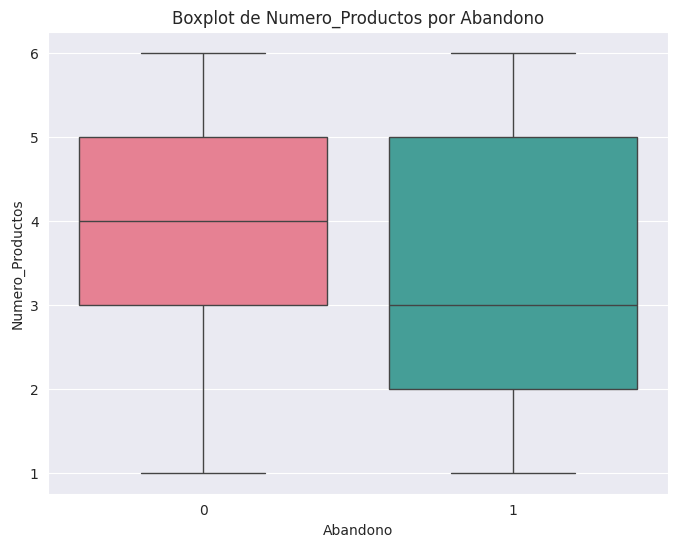

In [ ]:
boxplots = ['Cantidad_Transacciones', 'Monto_Transacciones', 'Saldo_Rotatorio', 'Numero_Productos']

for boxplot in boxplots:
    if boxplot != 'Abandono':
        plt.figure(figsize = (8,6))
        sns.boxplot(data = df_bank, x = 'Abandono', y = boxplot, palette='husl')
        plt.title(f'Boxplot de {boxplot} por Abandono')
        plt.show()

In [ ]:
corr_abandono = df.corrwith(df_bank['Abandono']).sort_values(ascending = False)
print(corr_abandono)

Abandono                      1.000000
Contactos_12m                 0.193923
Meses_Inactivo_12m            0.152732
Genero                        0.035358
Nivel_Educativo               0.028379
Franja_Edad                   0.011498
Numero_Dependientes           0.011423
Meses_Cliente                 0.009249
Promedio_Disponible           0.007802
Categoria_Tarjeta             0.005794
Categoria_Ingresos           -0.007471
Limite_Credito               -0.015815
Estado_Civil                 -0.016325
Cambio_Total_Q4_Q1           -0.132702
Numero_Productos             -0.145713
Monto_Transacciones          -0.160378
Ratio_Uso_Promedio           -0.183984
Saldo_Rotatorio              -0.265380
Cambio_Transacciones_Q4_Q1   -0.280460
Cantidad_Transacciones       -0.357261
dtype: float64


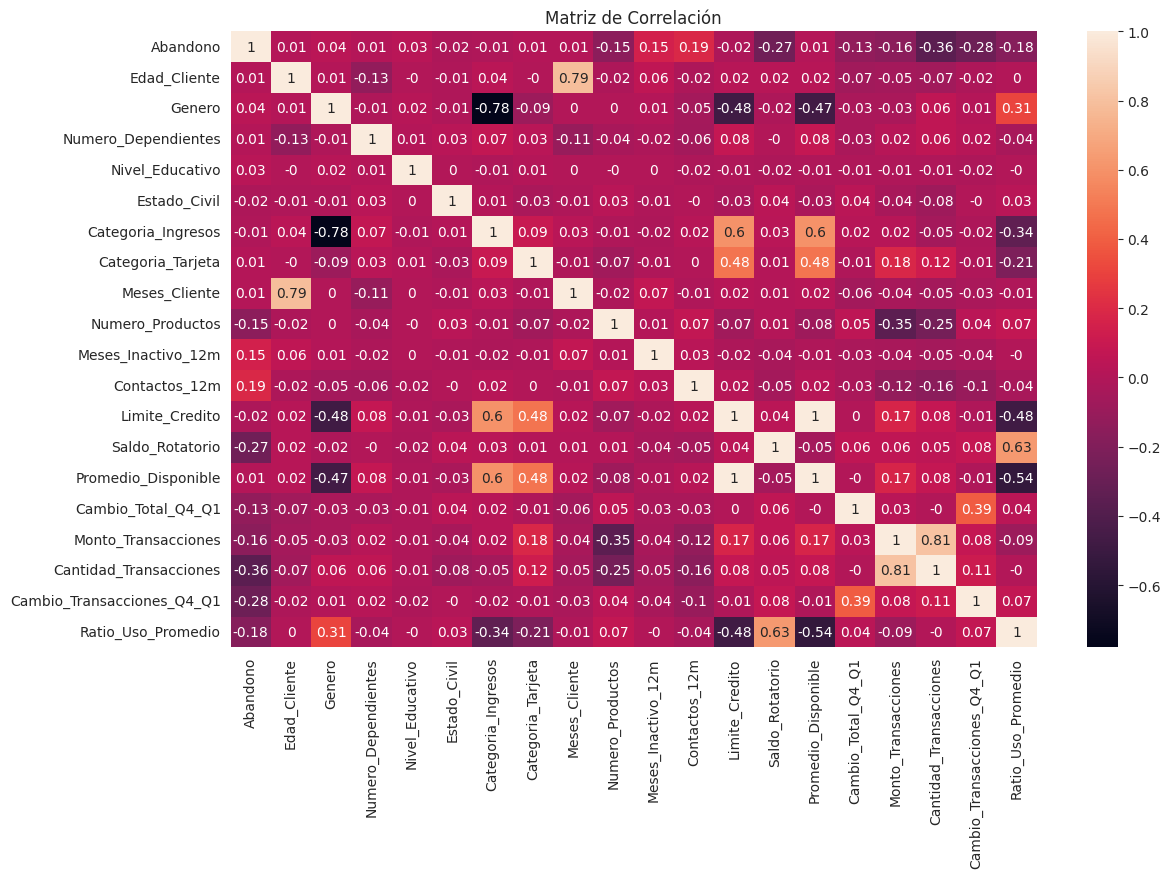

In [ ]:
corr = df_bank.corr(numeric_only= True).round(2)

plt.figure(figsize = (13,8))
sns.heatmap(corr, annot = True)
plt.title('Matriz de Correlación')
plt.show()

#**Conclusiones del EDA**
##A continuación se detallan las particularidades de abandono del servicio que se desprenden de los analisis posteriores
* Categoría de ingresos: menos de 40k.
* Género: Los hombres del rango de edad entre 40 a 50 años son quienes poseen mas gastos promedio.
* Categoría de tarjeta: Azul.
* Meses de relación: 36 meses de relación.
* Uso de productos: utiliza 3 productos.
* Número de meses inactivo: 2 a 3 meses inactivo.
* Número de contactos: 3 contactos en los últimos 12 meses.
* Límite de tarjetas: cuanto menor sea el límite de tarjetas, mayor será la deserción.
* Saldo rotatorio: cuando el saldo = 0 es donde vemos mayor concentración de abandono.
* Valor de transaccion: mayor concentración de abandono en clientes que realizaron transacciones por un valor de $2500.
* Número de transacciones: mayor concentración de abandono en clientes que realizaron entre 40 y 60 veces en los últimos 12 meses.

# **Modelos de Predicción**

#**Regresion Logistica**
La regresión logística es una técnica estadística que tiene como objetivo producir, a partir de un conjunto de observaciones, un modelo que permita predecir los valores tomados por una variable categórica, a menudo binaria, a partir de una serie de variables binarias continuas y/o explicativas.

In [ ]:
y = df_bank['Abandono']
X = df.drop(columns = 'Abandono')

La base de entrenamiento tiene 5664 elementos, y la base de testeo tiene 1417 elementos.
Score: 0.8852401129943502
Accuracy: 88.6
Reporte de Clasificacion: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1192
           1       0.76      0.40      0.53       225

    accuracy                           0.89      1417
   macro avg       0.83      0.69      0.73      1417
weighted avg       0.88      0.89      0.87      1417

Matriz de Confusión:


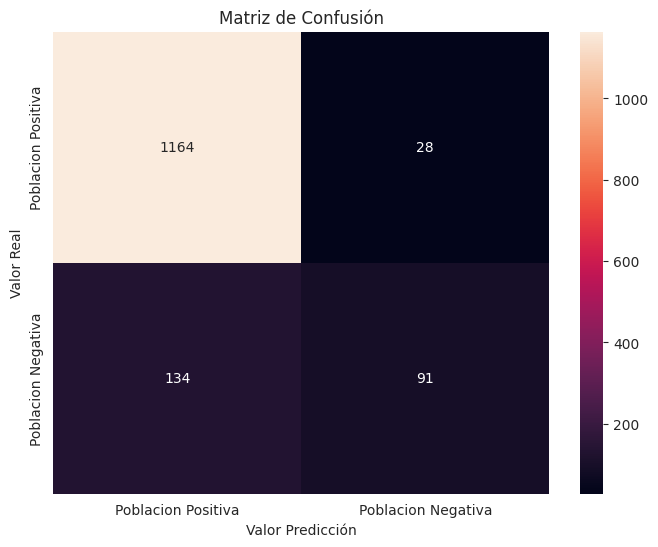

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)

base_train = X_train.shape[0]
base_test = X_test.shape[0]

print('La base de entrenamiento tiene %s elementos, y la base de testeo tiene %s elementos.' % (base_train, base_test))

log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, y_train)
print('Score:', log_reg.score(X_train, y_train))
y_pred_log = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred_log)
clas_report = classification_report(y_test, y_pred_log)
print('Accuracy:', round(acc, 3)*100)
print(f'Reporte de Clasificacion: \n{clas_report}')
print('Matriz de Confusión:')
matriz_conf = confusion_matrix(y_test, y_pred_log)
labels = ['Poblacion Positiva', 'Poblacion Negativa']

plt.figure(figsize = (8,6))
sns.heatmap(matriz_conf, annot = True, fmt = 'd', xticklabels = labels, yticklabels = labels)

plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicción')

plt.show()

ROC / AUC 0.8896644295302014


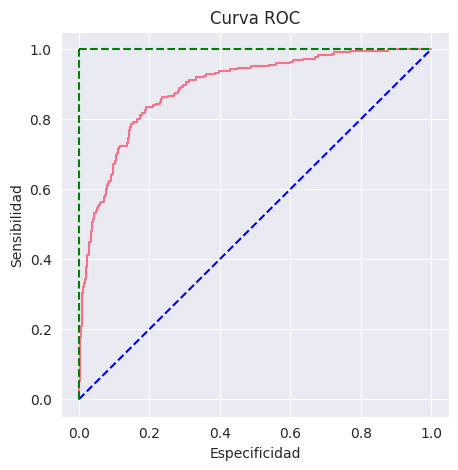

In [ ]:
probabilidad = log_reg.predict_proba(X_test)[:,1]

tfp, tvp, limite = roc_curve(y_test, probabilidad) #tfp = tasa falsos positivos - tvp = tasa verdaderos positivos
print('ROC / AUC', roc_auc_score(y_test, probabilidad))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.plot([0, 1], ls="--", c = 'blue')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# **Regresión Logística vs. Regresión Lineal**

**Objetivo y tipo de variable dependiente**

**Lineal:**
* El objetivo es predecir un valor continuo.
* La variable dependiente también es continua.
* Una posible regresión lineal a construir en este modelo: ingresos que el banco ya no obtendrá de la pérdida de clientes.

**Logística:**
* El objetivo es predecir la probabilidad de ocurrencia de una categoría.
* La variable dependiente es categórica.
* Por lo general, funciona según el éxito o el fracaso, o si es verdadero o falso.
* En nuestro caso, abandono o no abandono.

# **Interpretación de coeficientes**

**Lineal:**
* Los coeficientes representan la variación esperada en la variable dependiente, para una unidad de cambio en la variable independiente, manteniendo el resto constante.

**Logística:**
* Los coeficientes representan el cambio en el logaritmo (probabilidades) de la variable dependiente que es igual a 1 por una unidad de cambio en la variable independiente, manteniendo el resto constante.

# **Deducciones particulares**

  * Mientras que la Regresión Lineal se centra en hacer predicciones de valores en el futuro, la Regresión Logística se centra en la probabilidad de que ocurra el evento x.
  * Además, Regresión Logística se usa más en modelos de clasificación, mientras que Regresión Lineal se enfoca más en modelos de predicción.
  * La Regresión Logística también exige un esfuerzo mucho mayor en el tratamiento de los datos para poder utilizarlos.

# **Aplicación en este conjunto de datos: regresión logística**

* La aplicación del regegresión logística en este conjunto de datos se debe al hecho de que efectivamente queremos estimar la probabilidad de un evento en el banco en cuestión (Abandono) y no predecir un valor continuo a partir de ahora.
* Cuanto más pudiéramos estimar la probabilidad de que un cliente abandonara su tarjeta de crédito, más podríamos ayudar al banco a actuar sobre estos clientes con medidas de relación para evitar el evento que estimamos.

# **ROC y AUC**

  * # **ROC (Receiver Operating Characteristic)**

* Gráfico que muestra el desempeño de un modelo de clasificación (en nuestro caso el registro logístico).

* Tiene dos parámetros:
  * Tasa de verdaderos positivos (Sensibilidad):
    * Proporción de positivos reales que fueron identificados correctamente por el modelo.
  * Tasa de falsos positivos (Especificidad):
    * Proporción de aspectos negativos reales que el modelo identificó incorrectamente como positivos.
* Interpretación:
  * Cuanto más cerca de la parte superior izquierda, mejor será el modelo.
    * Esto se debe al hecho de que cuanto mayor sea la tasa de positivos reales identificados por el modelo, mejor se desempeñara y más correctamente clasificaba los datos ingresados.
  * Cuanto más cerca de la esquina inferior derecha, peor es el modelo.
    * Esto se debe al hecho de que cuanto mayor sea la tasa de negativos reales que el modelo identificó incorrectamente como positivos, peor será la clasificación del modelo según los datos de entrada.

* # **AUC (Área bajo la curva ROC)**
  * Medida resumen de la curva ROC:
    * Representa la probabilidad de que un clasificador clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio, suponiendo que el ejemplo positivo es positivo y el ejemplo negativo es negativo.
    * En la práctica, es un valor de 0 a 1, que mide la capacidad de discriminar correctamente los datos ingresados ​​al modelo.
      * Cuanto más cerca de 1, mejor.
      * Por debajo de 0,8: el modelo no tiene buena capacidad de discriminación.
      * Por encima de 0,8: el modelo tiene buena capacidad de discriminación.


# **Matriz de confusión**

1. Se utiliza para evaluar un modelo de clasificación.
2. Segrega la clasificación del modelo en 4 cuadrantes:

 * VP - Verdaderos Positivos: aquellos que fueron clasificados por el modelo como positivos y de hecho fueron positivos.
 * FP - Falsos Positivos: aquellos que fueron clasificados por el modelo como positivos, pero en realidad fueron negativos.
 * VN - Verdaderos Negativos: aquellos que fueron clasificados por el modelo como negativos y de hecho fueron negativos.
 * FN - Falsos Negativos: aquellos que fueron clasificados por el modelo como negativos, pero que en realidad fueron positivos.

2. Cómo interpretar ésta matriz:

 * Cuanto mayor sea el número de VP y VN: mejor será el modelo.
 * Cuanto menor sea el número de FP y FN: mejor será el modelo.
  ##### * cabe aclarar que cuando para ambos casos se presentase el escenario opuesto, el modelo tambíen sería cierto.


3. Usabilidad:

  * Es importante poder tener mayor profundidad en el análisis de la clasificación del modelo. Ejemplo: si el modelo está clasificando muchos falsos positivos significa que está siendo muy estricto en sus criterios de clasificación de verdaderos positivos.

# **Aplicación a este conjunto de datos de una Matriz de Confusión**

* **Verdaderos Positivos y Verdaderos Negativos:** Juntos representan aproximadamente el 90%, lo que nos muestra que solo el 10% de nuestros datos fueron clasificados incorrectamente. Según los parámetros utilizados en la ciencia de datos, esto indica una gran precisión del modelo que se construyo.

* **Falsos Negativos:** El modelo presentó solo 65 valores clasificados como falsos negativos (el pronóstico indicaba que el cliente no abandonaría y se suponía que el cliente abandonaría), lo cual para el modelo contruido es muy bueno, ya que donde más dinero podría perder el banco sería en este cuadrante.

* **Falsos Positivos:** El modelo clasificó a 156 clientes en el cuadrante de falsos positivos, es decir, clientes que en términos reales no abandonaron, el modelo clasificó en su predicción como "abandono". En este sentido, tenemos aquí una oportunidad de mejora para futuras evoluciones del modelo.

# **Informe de clasificación**

* También sirve como soporte para la evaluación del modelo regresión lineal.
* La información principal para evaluar la calidad del modelo es:
  1. Precisión (precision): proporción de predicciones positivas del modelo que realmente fueron correctas.
  2. Recuperación(recall): Capacidad del modelo para capturar todos los casos positivos reales.
  3. Puntuación - F1 (f1-score): Medida que combina Precisión y Recuperación en un solo número, siendo útil para generar un equilibrio entre falsos positivos y no perder demasiados positivos reales.
  4. Soporte (support): número de apariciones reales de cada clase en el conjunto de datos.
* Con esta información podemos comprender mejor dónde el modelo está funcionando bien y dónde puede necesitar mejoras, lo que permitirá realizar ajustes más efectivos.

# **Aplicando a este conjunto de datos: Informe de clasificación**

* Precisión: Obtuvimos una proporción de predicciones positivas del modelo que realmente fueron correctas de 0,92, lo que nos muestra que el modelo tuvo un muy buen desempeño en su clasificación.
* Recuperación: El modelo demostró una capacidad muy alta para capturar casos positivos superiores a 0,96 (solo 0,03 de los casos no fueron capturados por el modelo).
* Puntuación F1: El equilibrio entre las dos métricas anteriores se puede evidenciar en la puntuación F1 del modelo (0,94), lo que una vez más apunta a la alta calidad del modelo construido.

# **Árbol de Decisión**
En el contexto del presente proyecto, un árbol de decisión es un modelo de aprendizaje automático supervisado que será utilizado para predecir la probabilidad de abandono de clientes de tarjetas de crédito.

1. **Funcionamiento:**

    El árbol de decisión funciona como una serie de preguntas y respuestas sobre las características de los clientes (edad, ingresos, número de productos, etc.). Cada nodo del árbol representa una pregunta, y cada rama representa una posible respuesta. Al seguir las ramas según las respuestas, se llega a un nodo terminal (hoja) que indica la probabilidad de abandono para ese perfil de cliente.

2. **Ventajas:**

    * **Interpretabilidad:**  
    El árbol de decisión genera un modelo fácilmente interpretable. La estructura del árbol, con sus nodos y ramas, permite visualizar claramente las reglas de decisión que llevan a la predicción de abandono. Esto facilita la comunicación de los resultados a personas no técnicas, como gerentes o ejecutivos del banco.
    
    * **Manejo de variables mixtas:**

    El árbol de decisión puede manejar tanto variables categóricas (género, nivel educativo, etc.) como numéricas (edad, ingresos, etc.) sin necesidad de transformaciones complejas. Esto es especialmente útil en el proyecto, donde se cuenta con una variedad de características de los clientes de diferentes tipos.

    * **No requiere supuestos fuertes:**

    A diferencia de otros modelos como la regresión logística, el árbol de decisión no requiere supuestos fuertes sobre la distribución de los datos. Esto lo hace más flexible y adaptable a diferentes conjuntos de datos.

    * **Detección de interacciones:**

    El árbol de decisión puede identificar automáticamente interacciones entre variables que son importantes para predecir el abandono. Esto puede revelar patrones complejos en los datos que no serían evidentes con otros modelos más simples.

    * **Robustez a outliers:**

    El árbol de decisión es relativamente robusto a la presencia de valores atípicos (outliers) en los datos, ya que las decisiones se basan en la división de los datos en grupos, en lugar de en distancias entre puntos individuales.



La base de entrenamiento tiene 5664 elementos, y la base de testeo tiene 1417 elementos.
Score: 1.0
Accuracy: 92.4
Reporte de Clasificacion: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1192
           1       0.76      0.76      0.76       225

    accuracy                           0.92      1417
   macro avg       0.86      0.86      0.86      1417
weighted avg       0.92      0.92      0.92      1417

Matriz de Confusión:


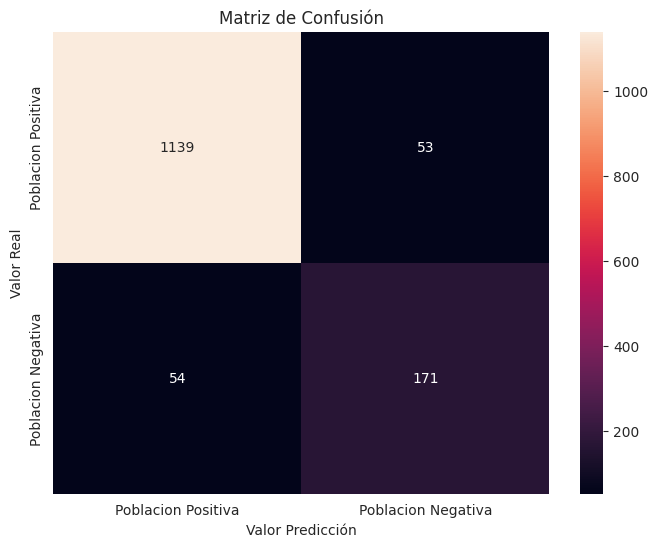

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.20, random_state=77)

base_train = X2_train.shape[0]
base_test = X2_test.shape[0]

print('La base de entrenamiento tiene %s elementos, y la base de testeo tiene %s elementos.' % (base_train, base_test))
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)
y2_pred_tree = tree_model.predict(X2_test)
print('Score:', tree_model.score(X2_train, y2_train))
y2_pred_tree = tree_model.predict(X2_test)
acc = accuracy_score(y2_test, y2_pred_tree)
clas_report = classification_report(y2_test, y2_pred_tree)
print('Accuracy:', round(acc, 3)*100)
print(f'Reporte de Clasificacion: \n{clas_report}')
print('Matriz de Confusión:')


matriz_conf = confusion_matrix(y2_test, y2_pred_tree)
labels = ['Poblacion Positiva', 'Poblacion Negativa']

plt.figure(figsize = (8,6))
sns.heatmap(matriz_conf, annot = True, fmt = 'd', xticklabels = labels, yticklabels = labels)

plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicción')
plt.show()

# **Optimización del modelo de Árbol de Decisión**
  Como se observa por las métricas arrojadas por ambos modelos se demuestra que el Árbol de Decisión ofrese mejores resultados pero el *Score* arroja un resultado igual a **1** lo que se traduce en que el modelo ha aprendido los datos de entrenamiento a la perfección, lo que hace probable que no generalice bien a nuevos datos. Por esta razón se intentará probar una mejora utilizando los métodos de:
  
  * Validación cruzada: se utiliza para evaluar la capacidad de generalización de un modelo de aprendizaje automático.
  * Grid Search CV: se utiliza para encontrar los mejores hiperparámetros para un modelo de árbol de decisión, lo que ayuda a mejorar su rendimiento.

De la utilización de éstos métodos obtendremos los mejores parámetros para configurar un nuevo modelo de Árbol de Desición.

**Validación Cruzada**

In [ ]:
tree_model = DecisionTreeClassifier()

scores = cross_val_score(tree_model, X, y, cv=5)

print("Accuracy de cada fold:", scores)
print("Accuracy promedio:", scores.mean())

Accuracy de cada fold: [0.86026817 0.88771186 0.9519774  0.93644068 0.85663842]
Accuracy promedio: 0.8986073067553398


**Grid Search CV**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X2_train, y2_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y2_pred_tree = best_model.predict(X2_test)
print('Accuracy:', round(accuracy_score(y2_test, y2_pred_tree), 3)*100)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 93.4


**Se aplican los parámetros obtenidos de la optimización**

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

tree_model.fit(X2_train, y2_train)

y2_pred_tree = tree_model.predict(X2_test)
print('Accuracy:', round(accuracy_score(y2_test, y2_pred_tree), 3)*100)

Accuracy: 93.2


La base de entrenamiento tiene 5664 elementos, y la base de testeo tiene 1417 elementos.
Score: 0.9789901129943502
Accuracy: 93.2
Reporte de Clasificacion: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1192
           1       0.82      0.73      0.77       225

    accuracy                           0.93      1417
   macro avg       0.88      0.85      0.87      1417
weighted avg       0.93      0.93      0.93      1417

Matriz de Confusión:


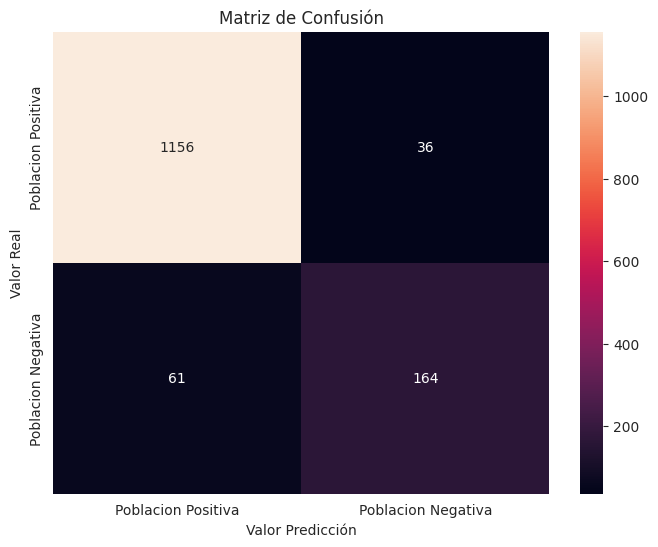

In [ ]:
print('La base de entrenamiento tiene %s elementos, y la base de testeo tiene %s elementos.' % (base_train, base_test))
matriz_conf = confusion_matrix(y2_test, y2_pred_tree)
labels = ['Poblacion Positiva', 'Poblacion Negativa']
acc = accuracy_score(y2_test, y2_pred_tree)
clas_report = classification_report(y2_test, y2_pred_tree)
print('Score:', tree_model.score(X2_train, y2_train))
print('Accuracy:', round(acc, 3)*100)
print(f'Reporte de Clasificacion: \n{clas_report}')
print('Matriz de Confusión:')
plt.figure(figsize = (8,6))
sns.heatmap(matriz_conf, annot = True, fmt = 'd', xticklabels = labels, yticklabels = labels)
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicción')
plt.show()




Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Results:
Accuracy: 0.9534227240649259
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1192
           1       0.93      0.77      0.84       225

    accuracy                           0.95      1417
   macro avg       0.94      0.88      0.91      1417
weighted avg       0.95      0.95      0.95      1417

Confusion Matrix:
 [[1178   14]
 [  52  173]]


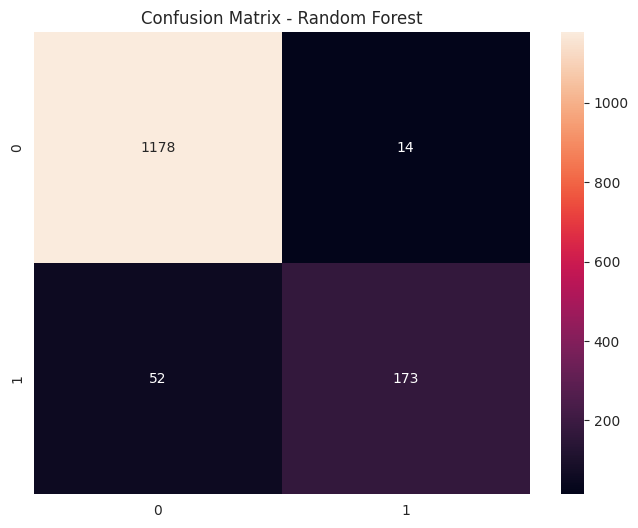


Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1'}
Logistic Regression Results:
Accuracy: 0.9004940014114327
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1192
           1       0.76      0.54      0.63       225

    accuracy                           0.90      1417
   macro avg       0.84      0.76      0.79      1417
weighted avg       0.89      0.90      0.89      1417

Confusion Matrix:
 [[1154   38]
 [ 103  122]]


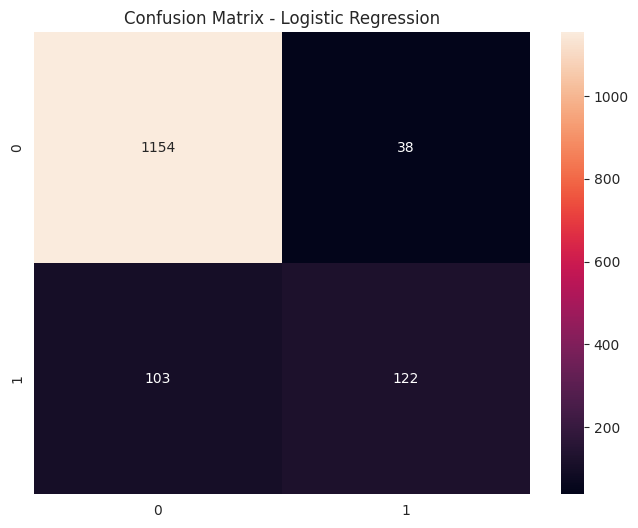


Linear Regression Results (R^2 score):
0.3511674862729359


In [ ]:
# prompt: crea un modelo de cross validation con grid search utilizando random forest, regresion logistica y regresion lineal

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'] # Regularization
}


# Assuming X and y are already defined from your previous code
# Example:
# X = df.drop(columns='Abandono')
# y = df['Abandono']

# Split Data (if not already split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot confusion matrix (optional)
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


# Create models
rf = RandomForestClassifier()
lr = LogisticRegression(solver='liblinear', max_iter=1000) # Increased max_iter to ensure convergence

# Create Grid Search objects
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')


# Fit Grid Search models
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)


# Evaluate and print best results
print("Best parameters for Random Forest:", grid_rf.best_params_)
evaluate_model(grid_rf.best_estimator_, "Random Forest")


print("\nBest parameters for Logistic Regression:", grid_lr.best_params_)
evaluate_model(grid_lr.best_estimator_, "Logistic Regression")


# Linear Regression (for comparison)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_linreg = lr_model.predict(X_test) # Predictions will be continuous


# Evaluate Linear Regression (metrics might need adaptation for regression)
print("\nLinear Regression Results (R^2 score):")
print(lr_model.score(X_test, y_test)) # R^2 score

# **Resultados de la optimización del modelo**

La optimización del modelo ha logrado reducir el sobreajuste que se mostraba en el primer modelo, permitiendo que el segundo modelo aprenda patrones más generales y mejore su capacidad de generalización. Aunque el *Score* en el conjunto de entrenamiento ha disminuido ligeramente, el aumento en la precisión (*Accuracy*) sugiere un mejor rendimiento en datos nuevos, lo cual es el objetivo principal de un modelo predictivo.

La optimización ha llevado a un modelo más robusto y confiable para predecir el abandono de clientes en situaciones reales.

# **Comparación de modelos Regresión Logística vs. Árbol de Decisión**
A continuación se muestra de manera gráfica la comparativa entre las métricas resultantes de ambos modelos.

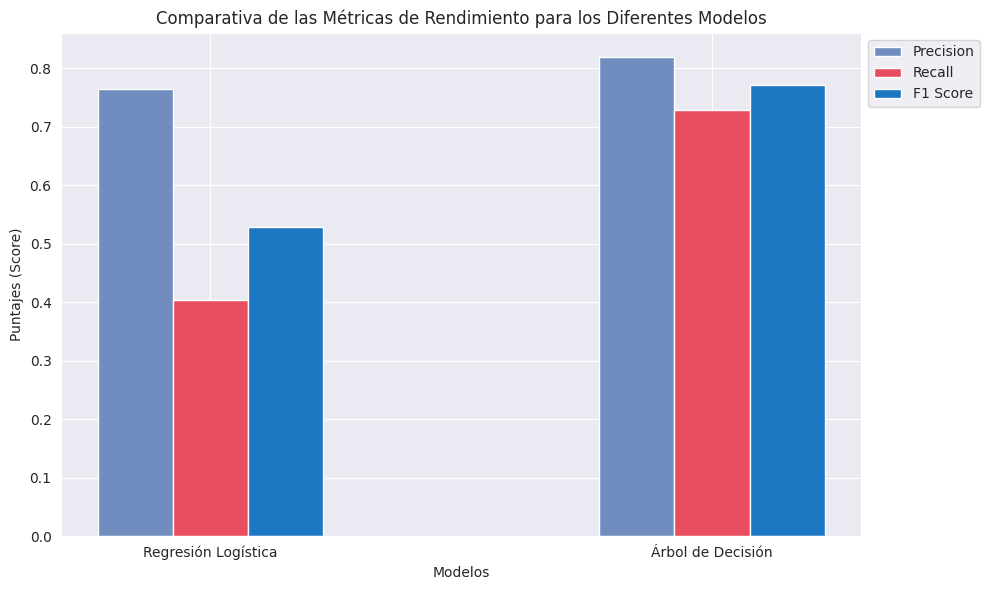

In [ ]:
reportes = {
    'Regresión Logística': classification_report(y_test, y_pred_log, output_dict=True),
    'Árbol de Decisión': classification_report(y2_test, y2_pred_tree, output_dict=True)
}

modelos = list(reportes.keys())
precision = [reportes[model]['1']['precision'] for model in modelos]
recall = [reportes[model]['1']['recall'] for model in modelos]
f1_score = [reportes[model]['1']['f1-score'] for model in modelos]

x = np.arange(len(modelos))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision', color="#718dbf")
bars2 = ax.bar(x, recall, width, label='Recall', color="#e84d60")
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score', color="#1c77c3")


ax.set_xlabel('Modelos')
ax.set_ylabel('Puntajes (Score)')
ax.set_title('Comparativa de las Métricas de Rendimiento para los Diferentes Modelos')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# **Resumen final de la comparativa entre los modelos**

A modo de resumen entre la comparativa de ambos modelos, el modelo de **Árbol de Decisión** optimizado parece superar al modelo de **Regresión Logística** en términos de *precisión*, *recall* y *F1-Score* para la clase positiva (clientes que abandonan). Sin embargo, la **Regresión Logística** puede ser más fácil de interpretar en términos de la influencia de cada variable en la predicción.

La elección del mejor modelo a la hora de predecir el abandono, dependerá de las necesidades específicas del cliente. Si la prioridad es maximizar la identificación correcta de clientes que abandonan, el **Árbol de Decisión** optimizado sería la mejor opción. Si la interpretabilidad del modelo es crucial, la **Regresión Logística** sería la  preferible.